<a href="https://colab.research.google.com/github/PadmaJyothi-U/Basics-of-NLP/blob/main/Bow%2Ctfidf_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
paragraph= """Dr. Kalam had his early training at NASA in 1963 before he set up India’s first rocket-launching facility in the fishing village of Thumba in Kerala.

“The name of the bacterium is Solibacillus kalamii, the species name is after Dr. Abdul Kalam and genus name is Solibacillus which is a spore-forming bacteria,” said Dr. Kasthuri Venkateswaran, senior research scientist, Biotechnology and Planetary Protection Group at JPL.

The filter on which the new bug was found remained on board the ISS for 40 months. Called a high-efficiency particulate arrestance filter or HEPA filter, this part is the routine housekeeping and cleaning system on board the international space station.

This filter was later analysed at JPL and only this year did Dr. Venkateswaran publish his discovery in the International Journal of Systematic and Evolutionary Microbiology.

Astronauts share space with them

According to Dr. Venkateswaran, even as it orbits the earth some 400 kilometres above, the ISS is home to many types of bacteria and fungi which co-inhabit the station with the astronauts who live and work on the station.

Dr. Venkateswaran said even though Solibacillus kalamii has never been found on earth till date, it is really not an extra-terrestrial life form or ET.

“I am reasonably sure it has hitch-hiked to the space station on board some cargo and then survived the hostile conditions of space,” he explained.

Naming the new microbe after Dr. Kalam was natural to Dr. Venkateswaran and his team. “Being a fellow Tamilian, I am aware of the huge contributions by Dr. Kalam,” he said.

New bacteria are usually named after famous scientists."""

In [ ]:
# importing packages
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# cleaning text
nltk.download('wordnet')
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus=[]

for i in range (len(sentences)):
  review = re.sub('[^a-zA-z]',' ',sentences[i]) # replacing all special characters with space , sub is a method to replace
  review = review.lower()                       # Lowering the text  - by converting all uppercase letter to lowercase
  review = review.split()   
  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Bag-of-words**
The bag-of-words model is a popular and simple feature extraction technique used when we work with text. It describes the occurrence of each word within a document.
To use this model, we need to:
Design a vocabulary of known words (also called tokens)
Choose a measure of the presence of known words
Any information about the order or structure of words is discarded. That’s why it’s called a bag of words. This model is trying to understand whether a known word occurs in a document, but don’t know where is that word in the document.

In [ ]:
# Creating bag of words of the model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)
X = cv.fit_transform(corpus).toarray()
print(X)

[[0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **TF-IDF**

One problem with scoring word frequency is that the most frequent words in the document start to have the highest scores. These frequent words may not contain as much “informational gain” to the model compared with some rarer and domain-specific words. One approach to fix that problem is to penalize words that are frequent across all the documents. This approach is called TF-IDF.
TF-IDF, short for term frequency-inverse document frequency is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus.
The TF-IDF scoring value increases proportionally to the number of times a word appears in the document, but it is offset by the number of documents in the corpus that contain the word.
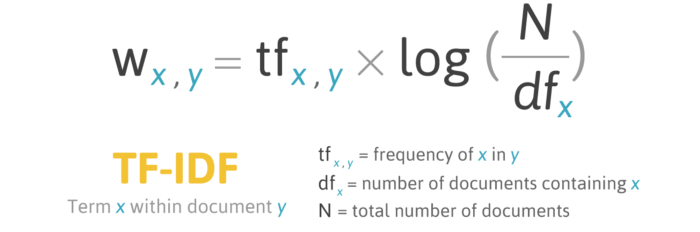

In [ ]:
# creating TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
y=tfidf.fit_transform(corpus).toarray()
print(y)

[[0.         0.         0.         ... 0.27012485 0.         0.        ]
 [0.18233912 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.
Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better

Based on the value of vector, we can identify which word is having more significance.